### Importing data

In [549]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [550]:
# Importing the dataset
df = pd.read_excel('КР-2.xlsx', sheet_name='Вар (21)')

In [551]:
df

,Успех,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Людинопотік,"Середній дохід наелення,грн",Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,не успішний,9.00,1,МАФ,1,NaN,1230.0,76.85,5211.0,13884.0,0,0,0,0,1
1,не успішний,30.00,1,МАФ,1,8.0,2715.0,84.86,2424.0,11700.0,0,0,0,0,0
2,не успішний,15.00,1,МАФ,1,NaN,878.0,112.02,3868.0,6786.0,0,0,0,0,0
3,не успішний,20.00,1,МАФ,1,NaN,2346.0,119.80,4546.0,12948.0,0,0,0,0,0
4,не успішний,30.00,1,Вбудоване приміщення,1,NaN,2542.0,94.88,3244.0,11427.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,МАФ,3,4.0,13552.0,107.37,2306.0,9399.0,0,0,0,0,0
65,успішний,27.26,1,МАФ,2,3.0,7598.0,89.13,4065.0,14079.0,0,0,0,0,0
66,не успішний,148.91,1,МАФ,1,12.0,5431.0,105.62,906.0,11427.0,1,0,0,0,0
67,не успішний,50.93,1,Вбудоване приміщення,2,17.0,4375.0,168.07,1742.0,13338.0,0,0,0,0,0


In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Успех                               69 non-null     object 
 1   Площадь загальна кв.м               69 non-null     float64
 2   Этаж                                69 non-null     int64  
 3   Тип                                 69 non-null     object 
 4   Количество сотрудников в магазине   69 non-null     int64  
 5   Кількість відгуків в гуглі          39 non-null     float64
 6   Количество чеков в месяц            62 non-null     float64
 7   Средний чек                         62 non-null     float64
 8   Людинопотік                         64 non-null     float64
 9   Середній дохід наелення,грн         64 non-null     float64
 10  Прогулянкова зона                   69 non-null     int64  
 11  Якість покриття перед магазином     69 non-null

In [553]:
# Drop useless
df = df.drop(['Этаж'], axis='columns', inplace=False)

### Missing data

In [554]:
df.dtypes

Успех                                  object
Площадь загальна кв.м                 float64
Тип                                    object
Количество сотрудников в магазине       int64
Кількість відгуків в гуглі            float64
Количество чеков в месяц              float64
Средний чек                           float64
Людинопотік                           float64
Середній дохід наелення,грн           float64
Прогулянкова зона                       int64
Якість покриття перед магазином         int64
Стихійна торгівля                       int64
Зона пікніка                            int64
Церква                                  int64
dtype: object

In [555]:
df.isnull().sum()

Успех                                  0
Площадь загальна кв.м                  0
Тип                                    0
Количество сотрудников в магазине      0
Кількість відгуків в гуглі            30
Количество чеков в месяц               7
Средний чек                            7
Людинопотік                            5
Середній дохід наелення,грн            5
Прогулянкова зона                      0
Якість покриття перед магазином        0
Стихійна торгівля                      0
Зона пікніка                           0
Церква                                 0
dtype: int64

In [556]:
#!pip install sklearn

In [557]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(df[['Кількість відгуків в гуглі']]).round()
df[['Количество чеков в месяц']] = imputer_mean.fit_transform(df[['Количество чеков в месяц']]).round()
df[['Средний чек']] = imputer_mean.fit_transform(df[['Средний чек']]).round()
df[['Людинопотік']] = imputer_mean.fit_transform(df[['Людинопотік']]).round()
df[['Середній дохід наелення,грн']] = imputer_mean.fit_transform(df[['Середній дохід наелення,грн']]).round()

In [558]:
df.isnull().sum()

Успех                                 0
Площадь загальна кв.м                 0
Тип                                   0
Количество сотрудников в магазине     0
Кількість відгуків в гуглі            0
Количество чеков в месяц              0
Средний чек                           0
Людинопотік                           0
Середній дохід наелення,грн           0
Прогулянкова зона                     0
Якість покриття перед магазином       0
Стихійна торгівля                     0
Зона пікніка                          0
Церква                                0
dtype: int64

### Outliers

In [559]:
df.describe()

,Площадь загальна кв.м,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Людинопотік,"Середній дохід наелення,грн",Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,1.869565,42.898551,7097.188406,95.942029,2755.782609,11306.855072,0.188406,0.115942,0.101449,0.043478,0.086957
std,37.862989,0.838645,61.280489,4049.160557,18.185227,1981.850301,2347.336283,0.393901,0.322501,0.304135,0.205425,0.283836
min,4.000000,1.000000,1.000000,878.000000,65.000000,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,1.000000,12.000000,3734.000000,85.000000,1296.000000,10296.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,2.000000,43.000000,6810.000000,95.000000,2269.000000,11427.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,2.000000,43.000000,8548.000000,101.000000,3880.000000,12948.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,232.300000,4.000000,367.000000,17537.000000,168.000000,10016.000000,14937.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [560]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [561]:
# Outliers
df = outliers(df)
df

,Успех,Площадь загальна кв.м,Тип,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Людинопотік,"Середній дохід наелення,грн",Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,не успішний,9.00,МАФ,1,43.0,1230.0,77.000000,5211.0,13884.0,0,0,0,0.0,0.938463
1,не успішний,30.00,МАФ,1,8.0,2715.0,85.000000,2424.0,11700.0,0,0,0,0.0,0.000000
2,не успішний,15.00,МАФ,1,43.0,878.0,112.000000,3868.0,6786.0,0,0,0,0.0,0.000000
3,не успішний,20.00,МАФ,1,43.0,2346.0,120.000000,4546.0,12948.0,0,0,0,0.0,0.000000
4,не успішний,30.00,Вбудоване приміщення,1,43.0,2542.0,95.000000,3244.0,11427.0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,МАФ,3,4.0,13552.0,107.000000,2306.0,9399.0,0,0,0,0.0,0.000000
65,успішний,27.26,МАФ,2,3.0,7598.0,89.000000,4065.0,14079.0,0,0,0,0.0,0.000000
66,не успішний,148.91,МАФ,1,12.0,5431.0,106.000000,906.0,11427.0,1,0,0,0.0,0.000000
67,не успішний,50.93,Вбудоване приміщення,2,17.0,4375.0,150.497709,1742.0,13338.0,0,0,0,0.0,0.000000


### Encoding

In [562]:
# Cheking categorical data
dfs = df[['Успех', 'Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Успех,2,"[не успішний, успішний]",object
1,Тип,3,"[МАФ, Вбудоване приміщення, Острівок на ринку]",object


In [563]:
# Encoding
success = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(success)
type = {'МАФ':0,'Вбудоване приміщення':1,'Острівок на ринку':2}
df['Тип'] = df['Тип'].map(type)
df

,Успех,Площадь загальна кв.м,Тип,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Людинопотік,"Середній дохід наелення,грн",Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,0,9.00,0,1,43.0,1230.0,77.000000,5211.0,13884.0,0,0,0,0.0,0.938463
1,0,30.00,0,1,8.0,2715.0,85.000000,2424.0,11700.0,0,0,0,0.0,0.000000
2,0,15.00,0,1,43.0,878.0,112.000000,3868.0,6786.0,0,0,0,0.0,0.000000
3,0,20.00,0,1,43.0,2346.0,120.000000,4546.0,12948.0,0,0,0,0.0,0.000000
4,0,30.00,1,1,43.0,2542.0,95.000000,3244.0,11427.0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,0,3,4.0,13552.0,107.000000,2306.0,9399.0,0,0,0,0.0,0.000000
65,1,27.26,0,2,3.0,7598.0,89.000000,4065.0,14079.0,0,0,0,0.0,0.000000
66,0,148.91,0,1,12.0,5431.0,106.000000,906.0,11427.0,1,0,0,0.0,0.000000
67,0,50.93,1,2,17.0,4375.0,150.497709,1742.0,13338.0,0,0,0,0.0,0.000000


### Correlation

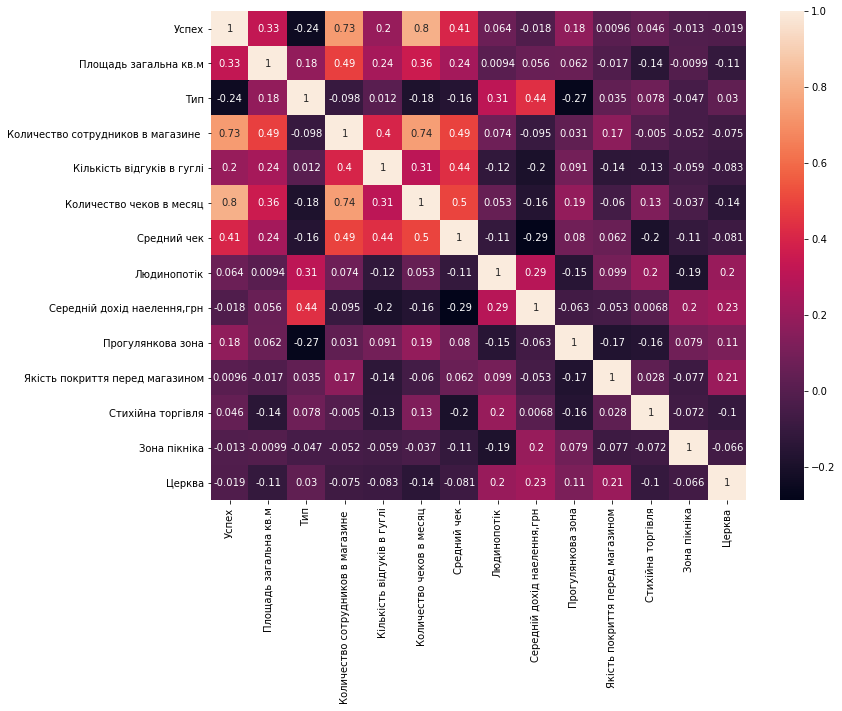

In [564]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

### Splitting

In [565]:
# Splitting the dataset into the Training set and Test set
# f =['Успех','Площадь загальна кв.м','Тип','Количество сотрудников в магазине','Кількість відгуків в гуглі','Количество чеков в месяц','Средний чек','Людинопотік','Середній дохід наелення,грн','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля','Зона пікніка','Церква']


f = ['Площадь загальна кв.м','Средний чек']
X = df[f]
y = df['Успех']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [566]:
df.to_csv('prepeared_df.csv', sep=',', index=False)

### Feature Selection


In [567]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [568]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.583928
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.122    
Dependent Variable: Успех            AIC:              68.2321  
Date:               2022-01-11 22:07 BIC:              72.2468  
No. Observations:   55               Log-Likelihood:   -32.116  
Df Model:           1                LL-Null:          -36.572  
Df Residuals:       53               LLR p-value:      0.0028329
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       0.7242      0.3675    1.9709    0.0487    0.0040    1.4444
x2       0.7744      0.3582    2.1623    0.0306    0.0725    1.476

In [569]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression()
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

2
[ True  True]
[1 1]


In [570]:
# Leaving only Selected Features
X_train_select=X_train[:,[True,  True]]
X_test_select=X_test[:,[True,  True]]

In [571]:
X_train_select

array([[-8.17299029e-01,  1.26375757e+00],
       [ 3.12134487e+00, -1.12041886e-01],
       [-5.37965932e-01, -1.69366863e-01],
       [ 2.77324861e+00,  2.41025711e+00],
       [ 4.86335731e-02, -4.55991749e-01],
       [ 4.66782414e-02,  3.01203806e+00],
       [ 1.97603195e+00, -1.69366863e-01],
       [ 2.78358393e+00,  4.61207886e-01],
       [ 2.54084347e+00, -1.31586641e+00],
       [-6.65062491e-01, -1.02924152e+00],
       [-5.37965932e-01,  2.31907977e-01],
       [ 2.07002633e-02, -3.41341795e-01],
       [-5.37965932e-01, -5.70641704e-01],
       [ 3.00033361e-01,  1.09178264e+00],
       [-1.18966285e-01,  2.00898227e+00],
       [-5.37965932e-01, -8.57266590e-01],
       [ 4.86335731e-02, -5.70641704e-01],
       [-1.70084242e-01,  1.74583000e-01],
       [-6.14503200e-01, -5.13316727e-01],
       [ 3.00033361e-01,  9.77132681e-01],
       [-8.17299029e-01, -1.12041886e-01],
       [ 2.35786748e-01, -9.71916544e-01],
       [ 1.51513233e+00, -1.12041886e-01],
       [-7.

In [572]:
# Fitting Logistic Regression to the Training set 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train_select, y_train)

### Classification Tree

In [573]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

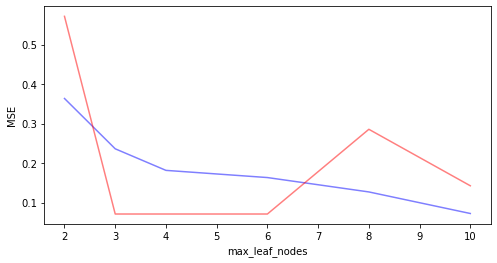

In [574]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [ 2, 3, 4, 6, 8, 10])

In [575]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 3, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [576]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test).round(3)

0.929

In [577]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0]
 [ 1  3]]


### Visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


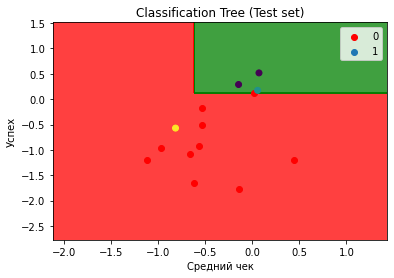

In [578]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Средний чек')
plt.ylabel('Успех')
plt.legend()
plt.show()

### Forest

In [579]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

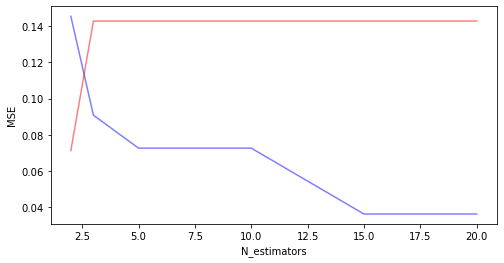

In [580]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 3, 5, 10, 15, 20])

In [581]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=3, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

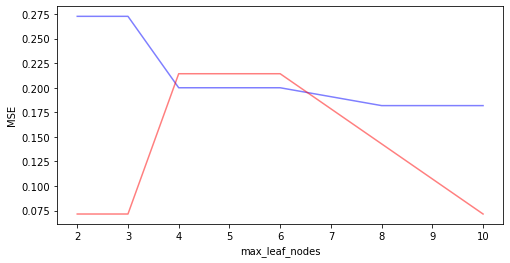

In [582]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 3, 4, 6, 8, 10])

In [583]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 3, max_leaf_nodes = 4, random_state = 10).fit(X_train, y_train)

In [584]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

0.786

In [585]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[9 1]
 [2 2]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


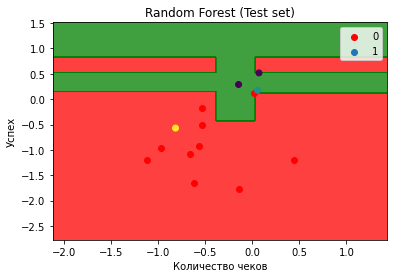

In [586]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Успех')
plt.legend()
plt.show()

In [587]:
ct.score(X_test,y_test).round(3) # tree

0.929

In [588]:
rf.score(X_test,y_test).round(3) # Forest

0.786

In [589]:
print(cm) # tree
print()
print(cm2) # Forest

[[10  0]
 [ 1  3]]

[[9 1]
 [2 2]]


Моделей дерева имеет большую точность чем модель леса

Модель дерева классифицирует больше позитивных и негативных результатов, а также допускает меньше ошибок первого и второго типа


### Hierarchical clustering

In [590]:
df = pd.read_csv('prepeared_df.csv', sep=',')
df

,Успех,Площадь загальна кв.м,Тип,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Людинопотік,"Середній дохід наелення,грн",Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,0,9.00,0,1,43.0,1230.0,77.000000,5211.0,13884.0,0,0,0,0.0,0.938463
1,0,30.00,0,1,8.0,2715.0,85.000000,2424.0,11700.0,0,0,0,0.0,0.000000
2,0,15.00,0,1,43.0,878.0,112.000000,3868.0,6786.0,0,0,0,0.0,0.000000
3,0,20.00,0,1,43.0,2346.0,120.000000,4546.0,12948.0,0,0,0,0.0,0.000000
4,0,30.00,1,1,43.0,2542.0,95.000000,3244.0,11427.0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,0,3,4.0,13552.0,107.000000,2306.0,9399.0,0,0,0,0.0,0.000000
65,1,27.26,0,2,3.0,7598.0,89.000000,4065.0,14079.0,0,0,0,0.0,0.000000
66,0,148.91,0,1,12.0,5431.0,106.000000,906.0,11427.0,1,0,0,0.0,0.000000
67,0,50.93,1,2,17.0,4375.0,150.497709,1742.0,13338.0,0,0,0,0.0,0.000000


In [591]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Успех','Площадь загальна кв.м','Тип','Количество сотрудников в магазине','Кількість відгуків в гуглі','Количество чеков в месяц','Средний чек','Людинопотік','Середній дохід наелення,грн','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля','Зона пікніка','Церква']).round()

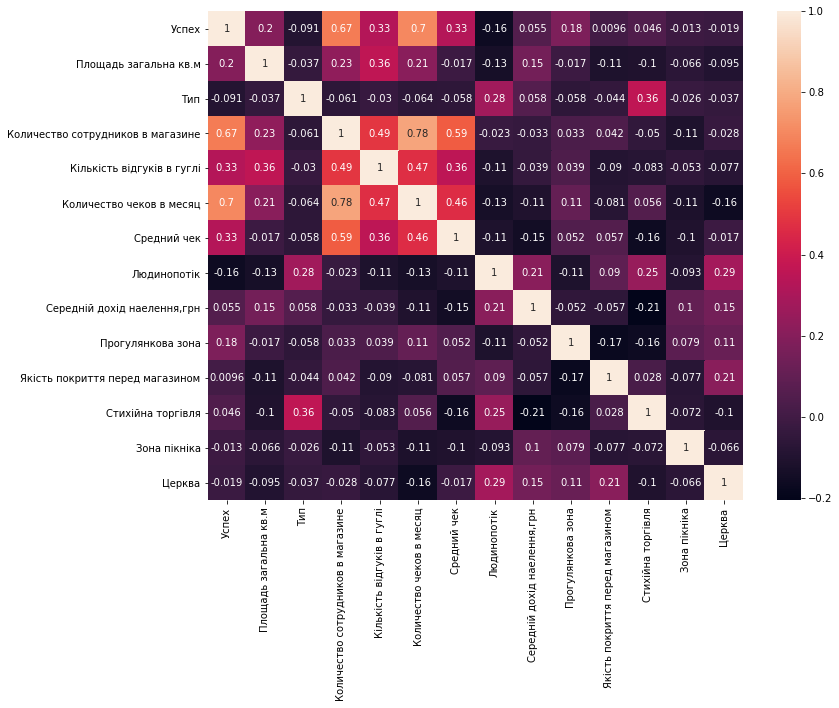

In [592]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

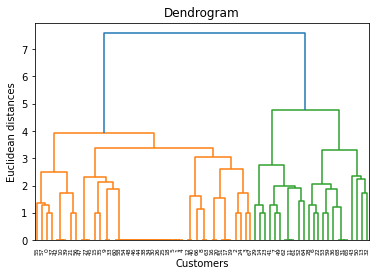

In [593]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Baseline model


In [594]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [595]:
hc

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

### Feature Reduction

In [596]:
# Less features
X = df.iloc[:, [0, 3, 5]]

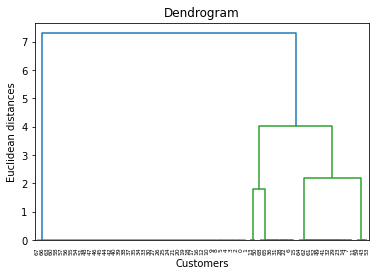

In [597]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [598]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [599]:
hc

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

### K-Means Clustering 

In [600]:
df = pd.read_csv('prepeared_df.csv', sep=',')
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Успех','Площадь загальна кв.м','Тип','Количество сотрудников в магазине','Кількість відгуків в гуглі','Количество чеков в месяц','Средний чек','Людинопотік','Середній дохід наелення,грн','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля','Зона пікніка','Церква']).round()


,Успех,Площадь загальна кв.м,Тип,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Людинопотік,"Середній дохід наелення,грн",Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Number of clusters

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


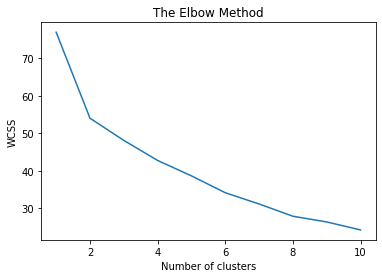

In [601]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

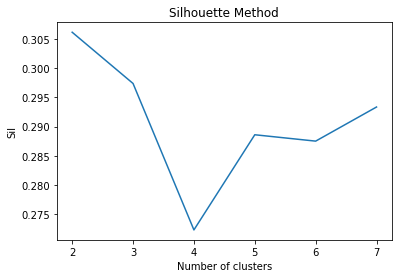

2:0.30617261192660516
3:0.29739145827249763
4:0.2722919077785789
5:0.2886017874284209
6:0.28751025439586314
7:0.29335862734189205


In [602]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

### Model

In [603]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 6, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Площадь загальна кв.м','Тип','Количество сотрудников в магазине','Кількість відгуків в гуглі','Количество чеков в месяц','Средний чек','Людинопотік','Середній дохід наелення,грн','Прогулянкова зона','Якість покриття перед магазином','Стихійна торгівля','Зона пікніка','Церква']).round(2)

,Успех,Площадь загальна кв.м,Тип,Количество сотрудников в магазине,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Людинопотік,"Середній дохід наелення,грн",Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка,Церква
0,1.0,0.39,0.19,0.59,0.20,0.61,0.46,0.35,0.67,0.0,0.17,0.17,0.00,0.06
1,-0.0,0.20,0.30,0.27,0.12,0.21,0.35,0.26,0.61,0.0,1.00,0.00,0.00,0.20
2,0.0,0.30,0.17,0.11,0.12,0.21,0.27,0.22,0.65,1.0,0.00,0.00,0.00,0.17
3,0.0,0.17,0.38,0.17,0.15,0.31,0.17,0.41,0.66,0.0,0.00,1.00,0.00,0.00
4,-0.0,0.21,0.28,0.11,0.15,0.22,0.31,0.29,0.68,0.0,-0.00,0.00,0.07,0.07
5,1.0,0.29,-0.00,0.48,0.28,0.69,0.49,0.23,0.63,1.0,0.00,0.00,0.14,0.14


### Feature Reduction

In [604]:
# Less features
X = df[:, [0, 3, 5]]

In [605]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество сотрудников в магазине','Количество чеков в месяц']).round()

,Успех,Количество сотрудников в магазине,Количество чеков в месяц
0,-0.0,0.0,0.0
1,1.0,1.0,1.0


In [606]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.942

Результаты иерархической кластеризации пересекаются на 94.2 % с результатами кластеризации на основе К-средних